# Hi everyone.
My project is about diabetes. I chose this data beacause diabetes has intresting me over the last few years
beacause I have a friend with diabetes and I want to help him with this desease . so what I'm gonna trying to do
is to predict what is the age of a human accordingly to the glucose, blood pressure, BMI, how does the 
relationship with family people who have diabete affects and more data..
the dataset came from kaggle web.
I'm gonna use LinearRegression, KnnRegessor models.
let's start.



I'm gonna start with importing all the libraries I need for this project.

In [915]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

First of all, let's read the data:

In [916]:
df = pd.read_csv('new_dataset.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,33.6,0.127,47,1
1,0,84,82,38.2,0.233,23,0
2,0,145,0,44.2,0.630,31,1
3,0,135,68,42.3,0.365,24,1
4,1,139,62,40.7,0.536,21,0


we want the data to be in same scale so we can see that only the "DiabetesPedigreeFunction" column is different from the other columns, so we gonna multiply this column by 100 and then it will be the genetic connection by percentage.

In [971]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction']*100
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,33.6,1270.0,47,1
1,0,84.0,82.0000,38.2,2330.0,23,0
2,0,145.0,69.1455,44.2,6300.0,31,1
3,0,135.0,68.0000,42.3,3650.0,24,1
4,1,139.0,62.0000,40.7,5360.0,21,0


To understand better the data, we gonna use describe() function:

In [918]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,32.193000,47.093000,33.090500,0.342000
std,3.306063,32.068636,19.188315,8.149901,32.355256,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,7.800000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,27.375000,24.400000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.300000,37.600000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.800000,62.400000,40.000000,1.000000
max,17.000000,199.000000,122.000000,80.600000,242.000000,81.000000,1.000000


In my data there are some values with the value 0 and it's not good 
beacause for example "bloodPressure" with 0
value is dead so I'm gonna check that values and then fix them.

In [974]:
print("In the Glucose column the number of the value 0 is:", len(df[df['Glucose']==0]))
print("In the BloodPressure column the number of the value 0 is:", len(df[df['BloodPressure']==0]))
print("In the BMI column the number of the value 0 is:", len(df[df['BMI']==0]))

In the Glucose column the number of the value 0 is: 0
In the BloodPressure column the number of the value 0 is: 0
In the BMI column the number of the value 0 is: 0


I'm gonna plot all the values 0 in the BMI ,BloodPressure , and Glucose.

<BarContainer object of 3 artists>

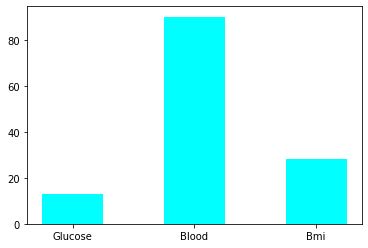

In [920]:
ValuesOf0 = [len(df[df['Glucose']==0]), len(df[df['BloodPressure']==0]), len(df[df['BMI']==0])]
Columns = ["Glucose", "Blood", "Bmi"]
plt.bar(Columns, height = ValuesOf0, width = 0.5, color = 'cyan')

In [921]:
#how many rows and columns do we have in our data
df.shape

(2000, 7)

In our data there are 2000 rows so the number of 0 in the columns is not so high and we can fix that by replace the values of 0  by the mean of each column.
first, we gonna calculate the mean of each column.

In [980]:
avg1 = df['BloodPressure'].mean()
avg2 = df['Glucose'].mean()
avg3 = df['BMI'].mean()
print('the average of BloodPressure column is: ',avg1)
print('the average of Glucose column is: ',avg2)
print('the average of BMI column is: ',avg3)

the average of BloodPressure column is:  72.25704749999998
the average of Glucose column is:  121.97018624999998
the average of BMI column is:  32.643701999999976


Now let's replace the values of 0 in the 3 columns:

In [981]:
df['BloodPressure'] = df['BloodPressure'].replace([0],avg1)
df['Glucose'] = df['Glucose'].replace([0],avg2)
df['BMI'] = df['BMI'].replace([0],avg3)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,33.6,1270.0,47,1
1,0,84.0,82.0000,38.2,2330.0,23,0
2,0,145.0,69.1455,44.2,6300.0,31,1
3,0,135.0,68.0000,42.3,3650.0,24,1
4,1,139.0,62.0000,40.7,5360.0,21,0


Now we gonna check how many nulls we have in our data:

In [982]:
df.isna().sum()
#so we can see we dont need to delete any null or change it to the mean because we dont have even 1 null. perfect.

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now after the data is okay. we need to split it to the train and test:

In [926]:
X = df.drop('Age', axis=1) 
y = df['Age']

In [927]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2,random_state = 42)


In [928]:
#to see if the data is split as we want to.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 6)
(1600,)
(400, 6)
(400,)


I'm gonna plot the Standard Normal distribution for understanding the data better and maybe scaling it to MinMax or standard scailing.
Important note: in the end I don't use scailing for my data beacause I don't need to. We see the results of the two models and than understand it better.

<Figure size 800x640 with 0 Axes>

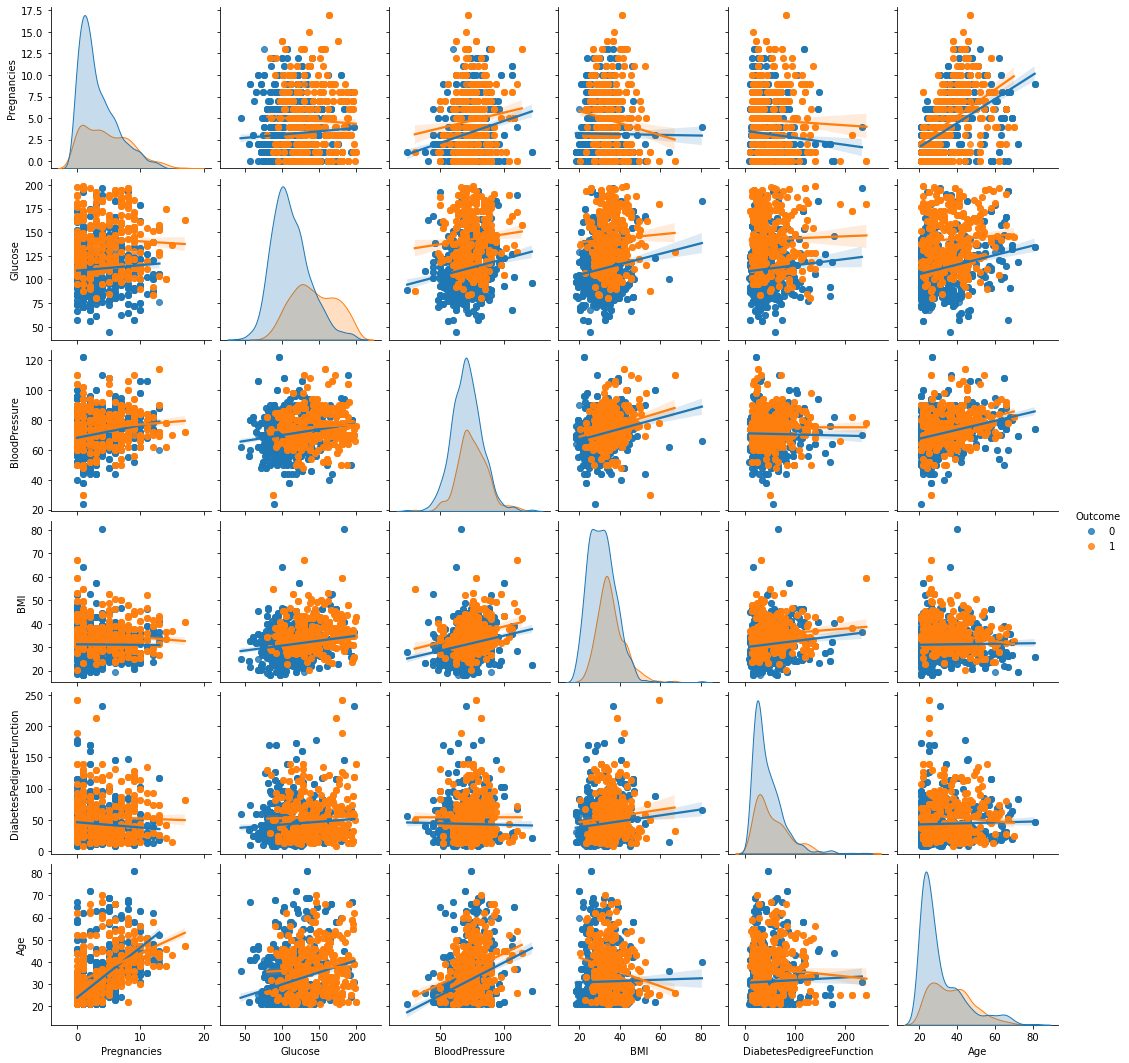

In [929]:
plt.figure(figsize=(10,8), dpi = 80)
sns.pairplot(df,kind='reg', hue = 'Outcome')
plt.show()

# trying to scale the data.                                                                                          important note: I don't scale my data in the end beacause I don't need to. But although I'm gonna share it with you.

In [930]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train_scaled_in_range = scaler.fit_transform(X_train)
# print("Min Value: ", X_train_scaled_in_range.min(axis=0))
# print("Max Value: ", X_train_scaled_in_range.max(axis=0))
# X_test_scaled_in_range = scaler.transform(X_test)

 

In [931]:
# #see the x_train of min_max scaling  in dataframe
# X_col = ["Pregnancies", "Glucose", "BloodPressure ", "BMI", "DiabetesPedigreeFunction", "Outcome"]
# scaled_set = pd.DataFrame(X_train_scaled_in_range)
# scaled_set.columns =  X_col
# scaled_set

to see the corrolation between our data I'm gonna use the corr() function and plot it.

In [983]:
df.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121569,0.199471,0.011439,-0.025453,0.539457,0.224437
Glucose,0.121569,1.000000,0.200509,0.233228,0.124176,0.259853,0.487977
BloodPressure,0.199471,0.200509,1.000000,0.259445,0.015216,0.325490,0.171844
BMI,0.011439,0.233228,0.259445,1.000000,0.142019,0.018815,0.282615
DiabetesPedigreeFunction,-0.025453,0.124176,0.015216,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.259853,0.325490,0.018815,0.026569,1.000000,0.236509
Outcome,0.224437,0.487977,0.171844,0.282615,0.155459,0.236509,1.000000


<AxesSubplot:>

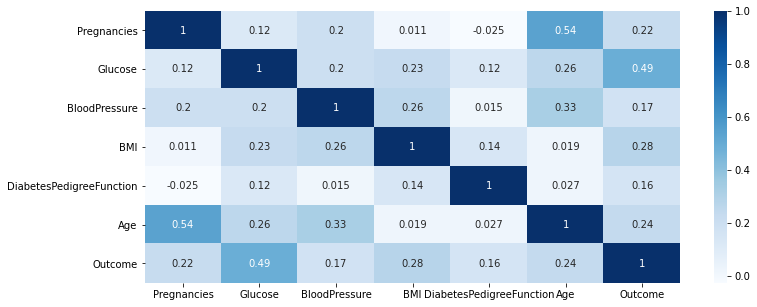

In [932]:
plt.subplots(figsize = (12,5))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'Blues')

now when my data is prepare for work, I'm gonna build models that I hope 
predict the age of human accordingly to the other parameters.
I'm gonna use LinearRegression and Knn regression as I said in the beginning.

In [933]:
lm = linear_model.LinearRegression()
knn = KNeighborsRegressor()

In [934]:
lm_model = lm.fit(X_train, y_train)
knn_model = knn.fit(X_train, y_train)

After building the models I'm going to evaluate the accuracies of the models. I'm gonna use r^2, mean_squared_error,mean_absolute_error, and square root of the mean_squared_error.

In [935]:
count = 0
modelArr = ["LinearRegression", "KNN"]
for i in (lm_model, knn_model):
    y_pred_train = i.predict(X_train)
    print(f"The r^2 accuracy for {modelArr[count]} model is: ", metrics.r2_score(y_train, y_pred_train))
    print(f"The MSE accuracy for {modelArr[count]} model is: ", metrics.mean_squared_error(y_train, y_pred_train))
    print(f"The MAE accuracy for {modelArr[count]} model is: ", metrics.mean_absolute_error(y_train, y_pred_train))
    print(f"The RMSE accuracy for {modelArr[count]} model is: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    count+=1
    print("--------------------------------------------------------------------")

The r^2 accuracy for LinearRegression model is:  0.377793215311388
The MSE accuracy for LinearRegression model is:  84.26320716333848
The MAE accuracy for LinearRegression model is:  6.548125911228621
The RMSE accuracy for LinearRegression model is:  9.179499287180018
--------------------------------------------------------------------
The r^2 accuracy for KNN model is:  0.6769739193296832
The MSE accuracy for KNN model is:  43.74625
The MAE accuracy for KNN model is:  4.55125
The RMSE accuracy for KNN model is:  6.61409479823203
--------------------------------------------------------------------


I'm gonna make a list of the title of each column beacause I will need it for the plot.

In [984]:
names = ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Outcome"]

 To check the linear corrolation between the age column and the other columns we are gonna plot it and it will be easier for understanding.

the Coefficient of the Pregnancies LinearFun is 1.9232152032464542 and the intercept is 25.967872494776753
the Coefficient of the Glucose LinearFun is 0.10030840965811606 and the intercept is 20.855864591558287
the Coefficient of the BloodPressure LinearFun is 0.3205354510721697 and the intercept is 9.929554686444327
the Coefficient of the BMI LinearFun is 0.030841813589868285 and the intercept is 32.08370902803278
the Coefficient of the DiabetesPedigreeFunction LinearFun is 9.678777182638569e-05 and the intercept is 32.63469734613799
the Coefficient of the Outcome LinearFun is 5.874833359995736 and the intercept is 31.081306990881462


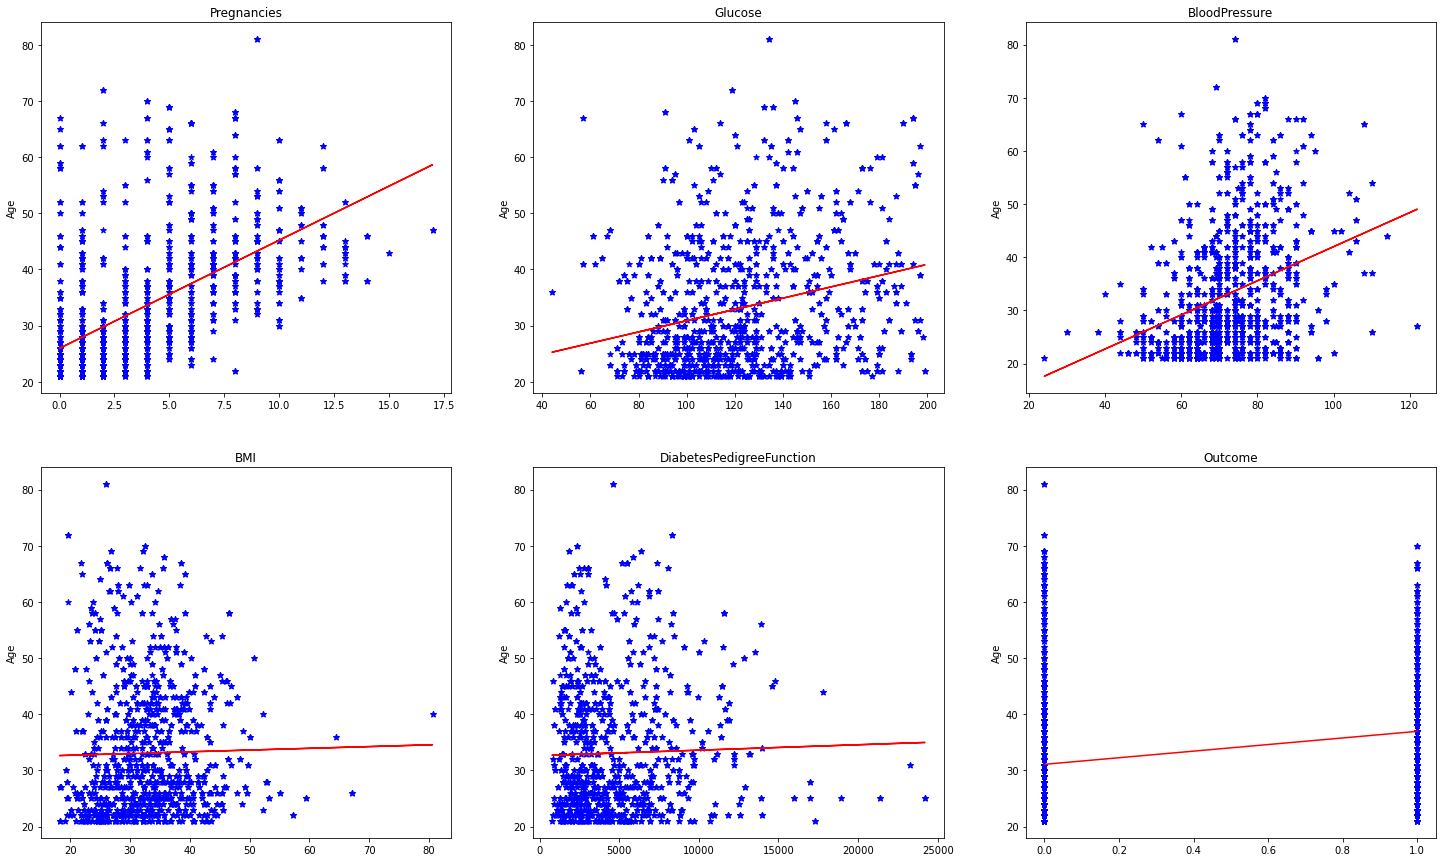

In [985]:
counter = 0
f, axi = plt.subplots(2,3, figsize = (25, 15))
for i in range(3):
    axi[counter][i].scatter(x=df[names[i]], y=df['Age'] ,c='b',marker='*',label=names[i])
    m, b = np.polyfit(df[names[i]], df['Age'], 1)
    axi[counter][i].plot(df[names[i]], m*df[names[i]]+b, color = 'r')
    axi[counter][i].set_title(names[i])
    axi[counter][i].set_ylabel("Age")
    print(f"the Coefficient of the {names[i]} LinearFun is {m} and the intercept is {b}")
    
counter = 1
for i in range(3):
    axi[counter][i].scatter(x=df[names[i+3]], y=df['Age'] ,c='b',marker='*',label=names[i+3])
    m, b = np.polyfit(df[names[i+3]], df['Age'], 1)
    axi[counter][i].plot(df[names[i+3]], m*df[names[i+3]]+b, color = 'r')
    axi[counter][i].set_title(names[i+3])
    axi[counter][i].set_ylabel("Age")
    print(f"the Coefficient of the {names[i+3]} LinearFun is {m} and the intercept is {b}")

Now this plot above make the corrolation clearer for me to understand.


# Tuning the models

# Seraching for the optimal k value in knn model

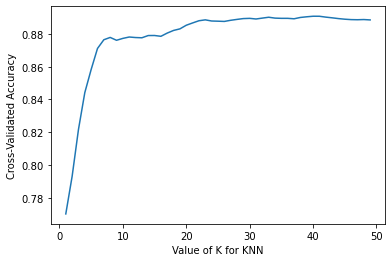

In [939]:
k_range = range(1, 50)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k,  weights = 'distance', p=1)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

As we can see the optimal value for k is between 38-42

In [987]:
for k in range(1,50,2):
    knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance', p=1)
    ValScore = cross_val_score(knn, X_train, y_train, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.7701562266940639
Cross-validation score for k = 3 is: 0.8217056673636847
Cross-validation score for k = 5 is: 0.8582949363330876
Cross-validation score for k = 7 is: 0.8764315578923109
Cross-validation score for k = 9 is: 0.8761118107481025
Cross-validation score for k = 11 is: 0.8781029273927003
Cross-validation score for k = 13 is: 0.8776350710191922
Cross-validation score for k = 15 is: 0.8790258384556544
Cross-validation score for k = 17 is: 0.8805127505669468
Cross-validation score for k = 19 is: 0.8830735733523886
Cross-validation score for k = 21 is: 0.8866884755269065
Cross-validation score for k = 23 is: 0.8885748683885119
Cross-validation score for k = 25 is: 0.8877582785323319
Cross-validation score for k = 27 is: 0.888306042535139
Cross-validation score for k = 29 is: 0.8893490323189258
Cross-validation score for k = 31 is: 0.8890982131125924
Cross-validation score for k = 33 is: 0.8901665996255878
Cross-validation score for k = 35 is:

We gonna use now in the GridSearchCV method for seeing who is the optimal k:

In [941]:
param_dict = {"n_neighbors": range(1,45,2), "weights": ['unifrom', 'distance'], "p": range(1,3)}
clf = GridSearchCV(knn, param_dict, cv = 10)
clf.fit(X_train, y_train)
print(" best parameter set is:", clf.best_params_, " and its score was", clf.best_score_)

 best parameter set is: {'n_neighbors': 41, 'p': 1, 'weights': 'distance'}  and its score was 0.8907652865301461


To improve the linearRegression model there are some tuning methods like: FeatureEngineering, LogTransformation etc.
I'm going to use this 2 methods to improve the linearRegression model but, I'm going to create new DataFrame including the changes because we are gonne compare between the two DataFrames.

In [942]:
df_copy = df.copy() # for not ruing the original dataframe
df_copy.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,33.6,12.7,47,1
1,0,84.0,82.0000,38.2,23.3,23,0
2,0,145.0,69.1455,44.2,63.0,31,1
3,0,135.0,68.0000,42.3,36.5,24,1
4,1,139.0,62.0000,40.7,53.6,21,0


In [943]:
df_copy.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121569,0.199471,0.011439,-0.025453,0.539457,0.224437
Glucose,0.121569,1.000000,0.200509,0.233228,0.124176,0.259853,0.487977
BloodPressure,0.199471,0.200509,1.000000,0.259445,0.015216,0.325490,0.171844
BMI,0.011439,0.233228,0.259445,1.000000,0.142019,0.018815,0.282615
DiabetesPedigreeFunction,-0.025453,0.124176,0.015216,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.259853,0.325490,0.018815,0.026569,1.000000,0.236509
Outcome,0.224437,0.487977,0.171844,0.282615,0.155459,0.236509,1.000000


Let's plot the distribution and see what we get:

<AxesSubplot:xlabel='Age', ylabel='Density'>

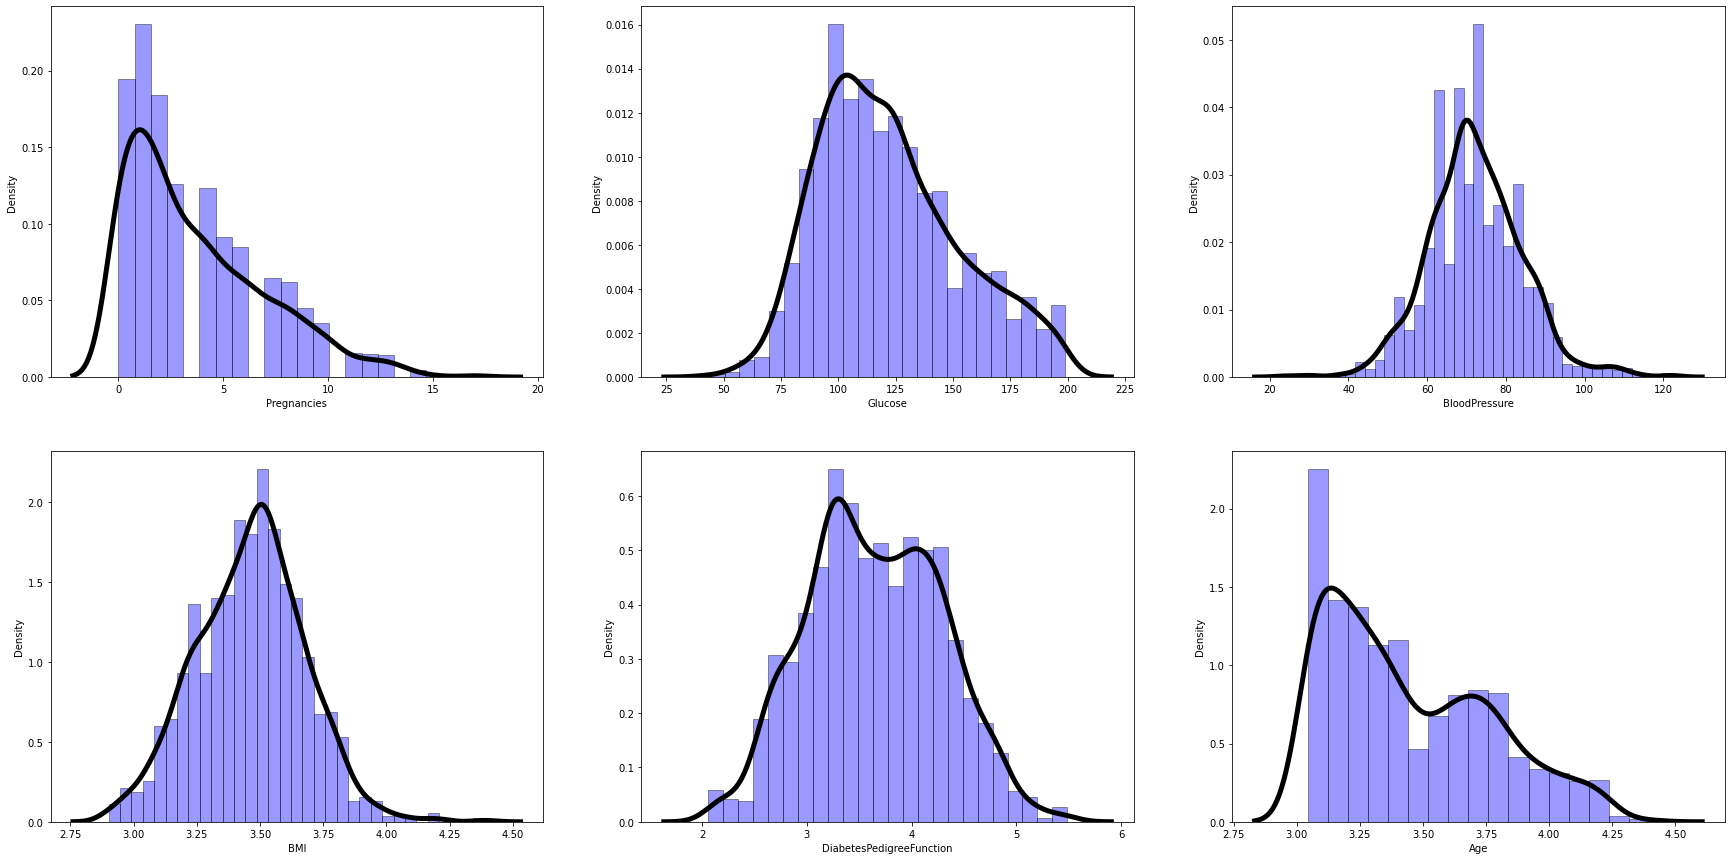

In [1003]:
fig, axes = plt.subplots(2,3, figsize = (30,15))

sns.distplot(df_copy['Pregnancies'], hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[0][0])
sns.distplot(df_copy['Glucose'], hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[0][1])
sns.distplot(df_copy['BloodPressure'], hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[0][2])
sns.distplot(df_copy['BMI'], hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[1][0])
sns.distplot(df_copy['DiabetesPedigreeFunction'], hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[1][1])
sns.distplot(df_copy['Age'], hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[1][2])

As we can see in the columns: BMI and DiabetesPedigreeFunction we have diverging to left of the distribution so we are going to use LogTransformation on this columns only(we can't use the Log transformation in the columns: Outcome and pregnacies because they including values of 0).

<AxesSubplot:xlabel='Age', ylabel='Density'>

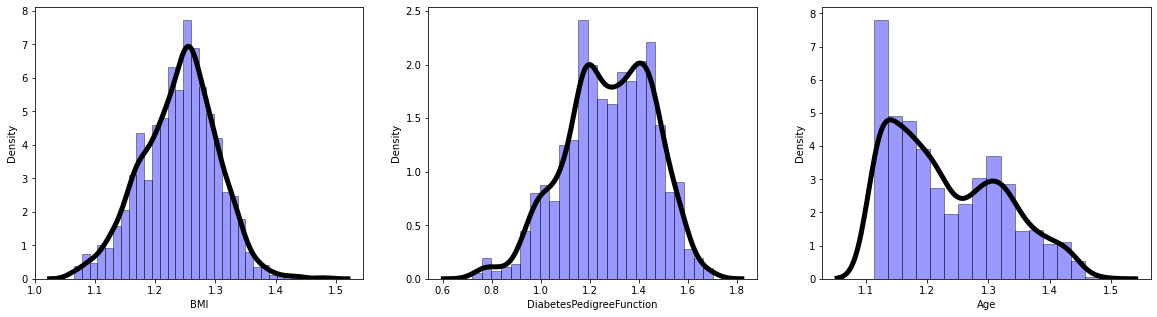

In [1004]:
fig, axes = plt.subplots(1,3, figsize = (20,5))

sns.distplot(np.log(df_copy['BMI']), hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[0])
sns.distplot(np.log(df_copy['DiabetesPedigreeFunction']), hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[1])
sns.distplot(np.log(df_copy['Age']), hist=True, kde=True, 
             color = 'Blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "black", 'linewidth': 5},
             ax = axes[2])

we can see that the distribution has changed due to the log transformation.
why log makes the distirbution better? because it's make the values closer to the mean.

Now let's make the changes in the df_copy:

In [946]:
df_copy['BMI'] = np.log(df_copy['BMI'])
df_copy['DiabetesPedigreeFunction'] = np.log(df_copy['DiabetesPedigreeFunction'])
df_copy['Age'] = np.log(df_copy['Age'])

In [947]:
X_copy = df_copy.drop(['Age'], axis = 1)
y_copy = df_copy['Age']

In [948]:
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 42)

In [949]:
lr_copy = LinearRegression()

In [950]:
lr_copy.fit(X_train_copy, y_train_copy)

LinearRegression()

In [951]:
y_pred_copy = lr_copy.predict(X_train_copy)
metrics.r2_score(y_train_copy, y_pred_copy)

0.42905383409433806

As we can see our model is little bit improved, now let's check for columns with great corrolation with the Age column and merge them, this method called FeatureEngineering.

<AxesSubplot:>

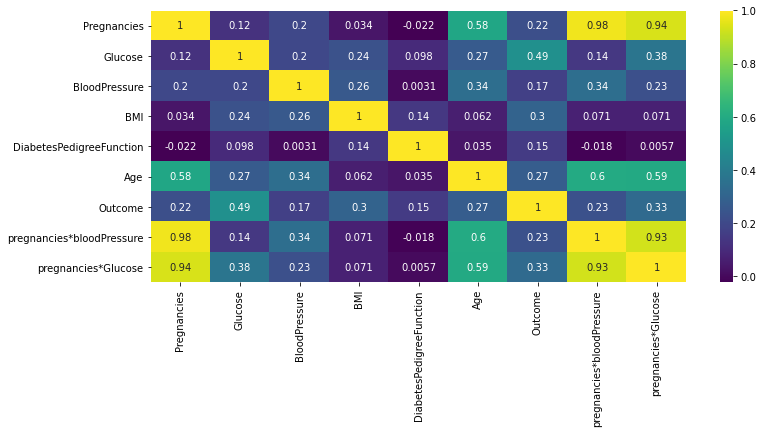

In [995]:
plt.subplots(figsize = (12,5))
corr = df_copy.corr()
sns.heatmap(corr, annot = True, cmap = 'viridis')

There is a strong corrolation between pregnacies and Age, BloodPressure and Age and we are going to merge them hopefully to get an awsome result.

In [954]:
df_copy['pregnancies*bloodPressure'] = df_copy['Pregnancies']*df_copy['BloodPressure']
df_copy.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,pregnancies*bloodPressure
0,2,138.0,62.0000,3.514526,2.541602,3.850148,1,124.0
1,0,84.0,82.0000,3.642836,3.148453,3.135494,0,0.0
2,0,145.0,69.1455,3.788725,4.143135,3.433987,1,0.0
3,0,135.0,68.0000,3.744787,3.597312,3.178054,1,0.0
4,1,139.0,62.0000,3.706228,3.981549,3.044522,0,62.0


In [955]:
df_copy['pregnancies*Glucose'] = df_copy['Pregnancies']*df_copy['Glucose']
df_copy.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,pregnancies*bloodPressure,pregnancies*Glucose
0,2,138.0,62.0000,3.514526,2.541602,3.850148,1,124.0,276.0
1,0,84.0,82.0000,3.642836,3.148453,3.135494,0,0.0,0.0
2,0,145.0,69.1455,3.788725,4.143135,3.433987,1,0.0,0.0
3,0,135.0,68.0000,3.744787,3.597312,3.178054,1,0.0,0.0
4,1,139.0,62.0000,3.706228,3.981549,3.044522,0,62.0,139.0


In [956]:
df_copy.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,pregnancies*bloodPressure,pregnancies*Glucose
Pregnancies,1.000000,0.121569,0.199471,0.034046,-0.022250,0.583813,0.224437,0.977311,0.939177
Glucose,0.121569,1.000000,0.200509,0.237200,0.097674,0.266363,0.487977,0.144238,0.376638
BloodPressure,0.199471,0.200509,1.000000,0.258794,0.003141,0.341186,0.171844,0.343246,0.226784
BMI,0.034046,0.237200,0.258794,1.000000,0.141966,0.062038,0.298579,0.070990,0.071459
DiabetesPedigreeFunction,-0.022250,0.097674,0.003141,0.141966,1.000000,0.034512,0.153959,-0.018149,0.005656
Age,0.583813,0.266363,0.341186,0.062038,0.034512,1.000000,0.274863,0.599942,0.593191
Outcome,0.224437,0.487977,0.171844,0.298579,0.153959,0.274863,1.000000,0.232826,0.325369
pregnancies*bloodPressure,0.977311,0.144238,0.343246,0.070990,-0.018149,0.599942,0.232826,1.000000,0.928521
pregnancies*Glucose,0.939177,0.376638,0.226784,0.071459,0.005656,0.593191,0.325369,0.928521,1.000000


In [957]:
X_copy = df_copy.drop(['Age'], axis = 1)
y_copy = df_copy['Age']

In [958]:
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 42)

In [959]:
lr_copy = LinearRegression()

In [960]:
lr_copy.fit(X_train_copy, y_train_copy)

LinearRegression()

In [961]:
y_pred_copy = lr_copy.predict(X_train_copy)
metrics.r2_score(y_train_copy, y_pred_copy)

0.43140209842103727

Now to see what is the optimal k after the FeatureEngineering, as we did earlier we gonna use it again:

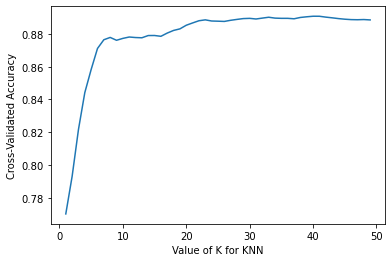

In [962]:
k_range = range(1, 50)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k,  weights = 'distance', p=1)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [963]:
for k in range(1,50,2):
    knn_copy = KNeighborsRegressor(n_neighbors = k, weights = 'distance', p=1)
    ValScore2 = cross_val_score(knn_copy, X_train_copy, y_train_copy, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore2)

Cross-validation score for k = 1 is: 0.8420733885998188
Cross-validation score for k = 3 is: 0.8610958113009733
Cross-validation score for k = 5 is: 0.8784387441713181
Cross-validation score for k = 7 is: 0.8889321362380803
Cross-validation score for k = 9 is: 0.8956092631725138
Cross-validation score for k = 11 is: 0.8988443679932553
Cross-validation score for k = 13 is: 0.8983004251492706
Cross-validation score for k = 15 is: 0.8969915705970802
Cross-validation score for k = 17 is: 0.8994850798529258
Cross-validation score for k = 19 is: 0.9008656468327146
Cross-validation score for k = 21 is: 0.9031814837789767
Cross-validation score for k = 23 is: 0.9047749877200897
Cross-validation score for k = 25 is: 0.9061836049244688
Cross-validation score for k = 27 is: 0.9065931330428707
Cross-validation score for k = 29 is: 0.9063425638289374
Cross-validation score for k = 31 is: 0.9064201885210984
Cross-validation score for k = 33 is: 0.9073808291890163
Cross-validation score for k = 35 is

In [997]:
param_dict = {"n_neighbors": range(1,45,2), "weights": ['unifrom', 'distance'], "p": range(1,3)}
clf_copy = GridSearchCV(knn, param_dict, cv = 10)
clf_copy.fit(X_train_copy, y_train_copy)
print(" best parameter set is:", clf_copy.best_params_, " and its score was", clf_copy.best_score_)

 best parameter set is: {'n_neighbors': 41, 'p': 1, 'weights': 'distance'}  and its score was 0.9093392537166437


We can see that the dataframe copy is better than the original dataframe because our 2 models 'linearRegression' and 'knn' give better results after the changes we did to the dataframe like: FeatureEngineering and Log transformation.
So, I'm going to use this dataFrame from now.

# Comapre the data to dummy model

In [965]:
dummy_train = []
dummy_test = []
strategies = ['mean', 'median']

for i in strategies:
    clf_dummy = DummyRegressor(strategy = i) 
    clf_dummy.fit(X_train_copy, y_train_copy)
    y_pred_dummy_train = clf_dummy.predict(X_train)
    y_pred_dummy_test = clf_dummy.predict(X_test)
    train_accuracy = metrics.r2_score(y_true = y_train_copy, y_pred = y_pred_dummy_train)
    test_accuracy = metrics.r2_score(y_true = y_test_copy, y_pred = y_pred_dummy_test)
    dummy_train.append(train_accuracy)
    dummy_test.append(test_accuracy)

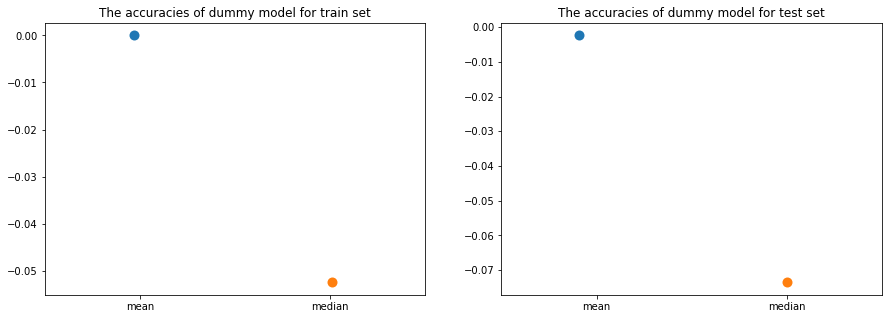

In [966]:
f, axes = plt.subplots(1,2, figsize = (15,5))
sns.stripplot(strategies, dummy_train,size = 10, ax = axes[0])
axes[0].set_title("The accuracies of dummy model for train set")
sns.stripplot(strategies, dummy_test,size = 10, ax = axes[1])
axes[1].set_title("The accuracies of dummy model for test set")
plt.show()

As we can see the best score for the dummy model is closer to 0 and our lower score is in linearRegression model with 44% accuracy score calculated by the r2 metric pass this dummy model and of-course the knn model pass the dummy model score too.

Now let's see what is the score for knn and the linear regression models with the new dataframe:

In [998]:
print("KNN score:", cross_val_score(knn_copy, X_train_copy, y_train_copy, cv=10, scoring='r2').mean())
print("LinearRegression score:", cross_val_score(lr_copy, X_train_copy, y_train_copy, cv=10, scoring='r2').mean())

KNN score: 0.909011064736889
LinearRegression score: 0.41484012149889676


We can see that the best model is knnRegressor so I'm going to choose this model to predict the test set and see what is the score there.

# Predicting the test set

In [999]:
knn_copy.fit(X_train_copy, y_train_copy)

KNeighborsRegressor(n_neighbors=49, p=1, weights='distance')

In [1000]:
y_pred_final = knn_copy.predict(X_test_copy)

In [970]:
final_score = metrics.r2_score(y_test_copy, y_pred_final)
final_score

0.9324079726388276

# Amazing!!!